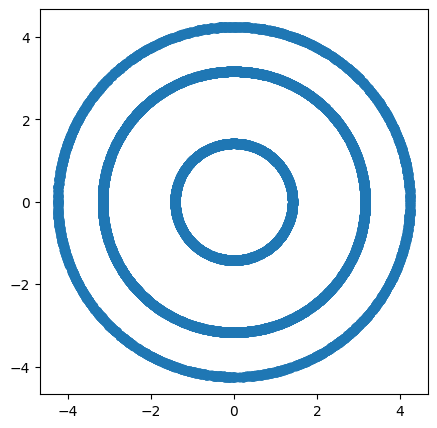

In [81]:
import numpy as np
import matplotlib.pyplot as plt

qam16_constellation = {
    0: (-3, -3), 1: (-3, -1), 2: (-3, 1), 3: (-3, 3),
    4: (-1, -3), 5: (-1, -1), 6: (-1, 1), 7: (-1, 3),
    8: (1, -3), 9: (1, -1), 10: (1, 1), 11: (1, 3),
    12: (3, -3), 13: (3, -1), 14: (3, 1), 15: (3, 3)
}

symbols=np.array([complex(i,q) for i,q in qam16_constellation.values()])

n_samples=10000

indices = np.random.randint(0, len(symbols), n_samples)
tx_symbols = symbols[indices]

freq_offset = 10*np.pi/180

n = np.arange(n_samples)
rx_symbols = tx_symbols * np.exp(1j * 2 * np.pi * freq_offset * n)

plt.figure(figsize=(5,5))
plt.scatter(np.real(rx_symbols), np.imag(rx_symbols))

Damping Ratio (ζ): 1.118033988749895
Overdamped (Slow Response): ζ>1


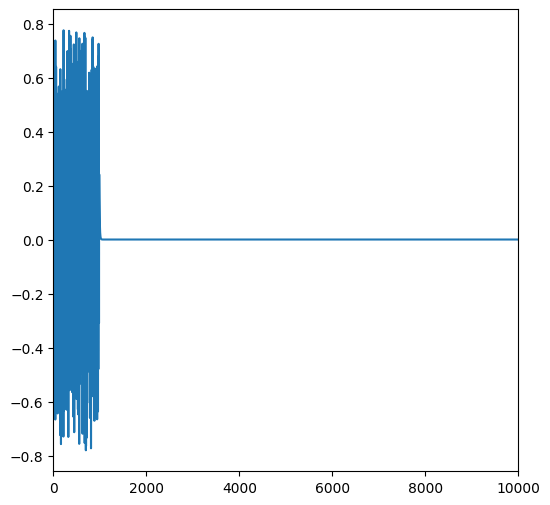

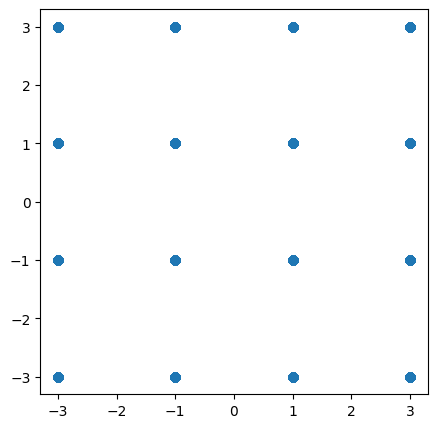

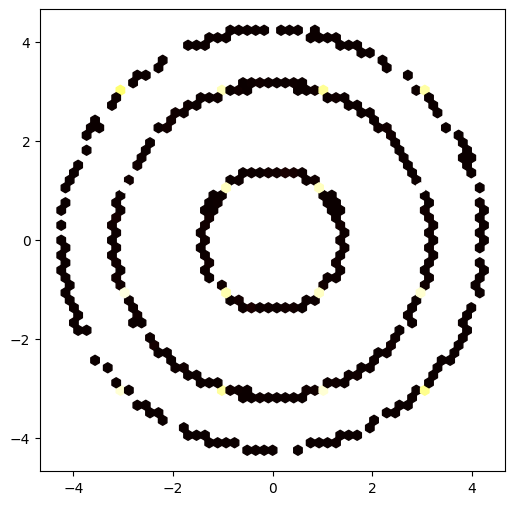

In [ ]:
recovered_symbols = np.zeros(n_samples, dtype=complex)

Kp = 0.5  
Ki = 0.05 
zeta = Kp / (2 * np.sqrt(Ki))

print(f"Damping Ratio (ζ): {zeta}")
if(zeta < 1):
        print("Underdamped (Oscillatory Response): ζ<1")
elif (zeta == 1):
        print("Critically Damped (Fastest No-Overshoot Response): ζ=1")
else:
        print("Overdamped (Slow Response): ζ>1")

phase_nco = 0  
freq_nco = 0   
integrator = 0 
phase_errors = np.zeros(n_samples)


for i in range(n_samples):
        corrected_symbol = rx_symbols[i] * np.exp(-1j * phase_nco)

        closest_symbol = symbols[np.argmin(abs(symbols - corrected_symbol))]
        phase_error = np.angle(corrected_symbol * np.conj(closest_symbol))
        phase_errors[i] = phase_error

        integrator += Ki * phase_error  
        freq_nco = Kp * phase_error + integrator  

        phase_nco += freq_nco  

        recovered_symbols[i] = corrected_symbol

plt.figure(figsize=(6,6))
plt.plot( range(n_samples), phase_errors)
plt.xlim(0,10000)

plt.figure(figsize=(5,5))
plt.scatter(np.real(recovered_symbols[2000:len(recovered_symbols)]),np.imag(recovered_symbols[2000:len(recovered_symbols)]))

plt.figure(figsize=(6, 6))
plt.hexbin(np.real(recovered_symbols), np.imag(recovered_symbols), gridsize=50, cmap="hot", mincnt=1)